In [1]:
# Importing Important Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [10]:
# Generating data
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=30)

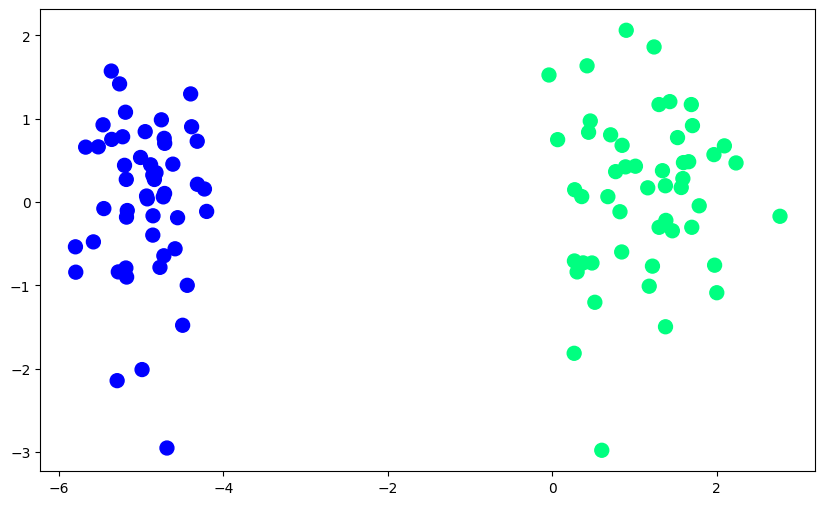

In [11]:
# Data Preview
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [12]:
# Applying perceptron trick for comparison
def step(z):
  return 1 if z>0 else 0

def perceptron(X,y):
  X = np.insert(X,0,1,axis=1)
  weights = np.ones(X.shape[1])
  lr = 0.1

  for i in range(1000):
    j = np.random.randint(100)
    y_hat = step(np.dot(X[j],weights))
    weights = weights + lr* (y[j] - y_hat)*X[j]

  return weights[0],weights[1:]

In [13]:
intercept_,coef_ = perceptron(X,y)

In [14]:
print('Intercept: ',intercept_)
print('coef_: ',coef_)

Intercept:  1.2000000000000002
coef_:  [1.1204053  0.40381514]


In [15]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [16]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

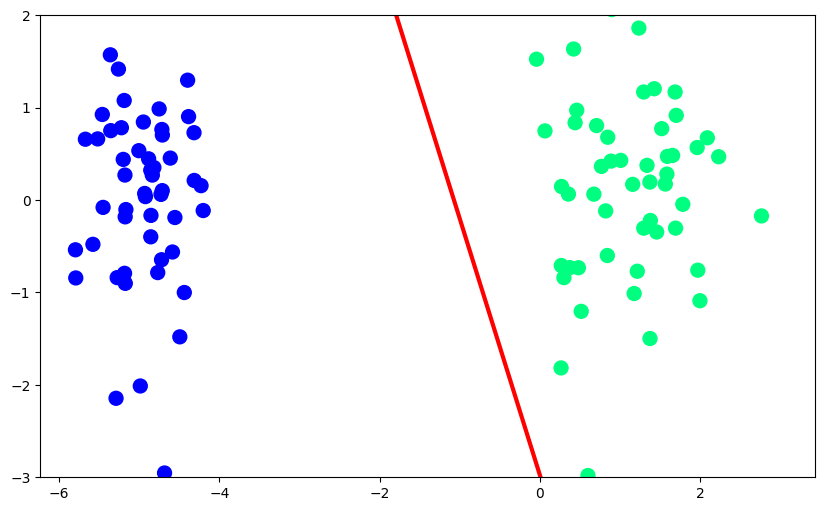

In [17]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# Problem with perceptron trick

In [18]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [19]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [20]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

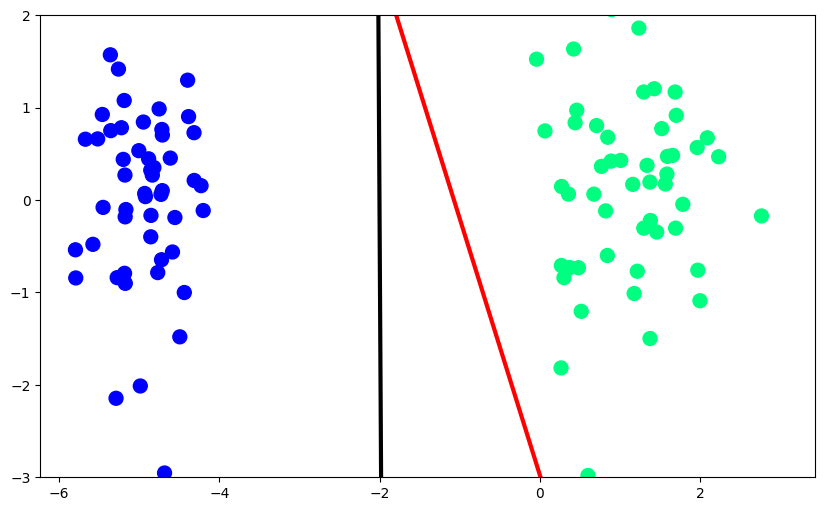

In [21]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# Applying Sigmoid Technique

In [24]:
def sigmoid(z):
  return 1 / (1 + np.exp(-(z)))

def perceptron(X,y):
  X = np.insert(X,0,1,axis=1)
  weights = np.ones(X.shape[1])
  lr = 0.1

  for i in range(1000):
    j = np.random.randint(100)
    y_hat = sigmoid(np.dot(X[j],weights))
    weights = weights + lr* (y[j] - y_hat)*X[j]

  return weights[0],weights[1:]

In [25]:
intercept_,coef_ = perceptron(X,y)

In [26]:
print('Intercept: ',intercept_)
print('coef_: ',coef_)

Intercept:  2.5573796806306786
coef_:  [2.30507391 0.23960665]


In [27]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [28]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b

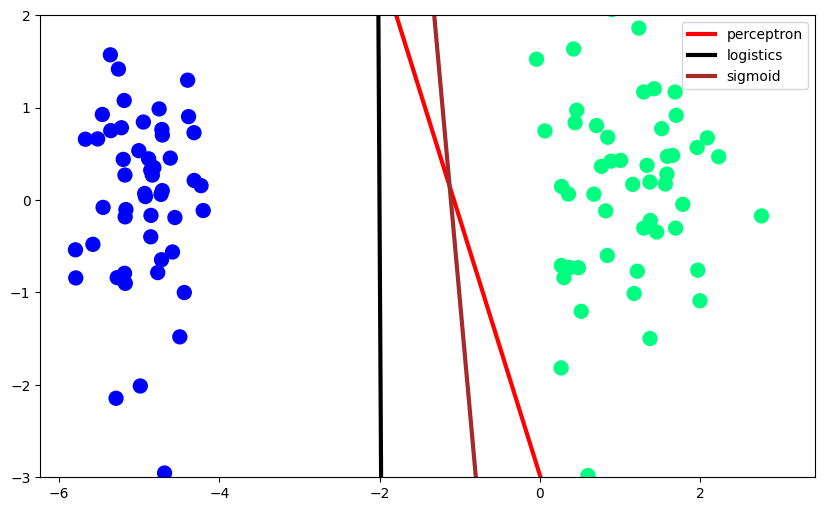

In [30]:
# Comparing perceptron, sigmoid and logistic regression line
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3, label='perceptron')
plt.plot(x_input1,y_input1,color='black',linewidth=3, label='logistics')
plt.plot(x_input2,y_input2,color='brown',linewidth=3, label='sigmoid')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

plt.legend()
plt.show()